In [15]:
import scipy.io as scio
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from compress import decompress

In [8]:
data = scio.loadmat('../Data/tissue3_1.mat')
target = data['bcc']        
no_baseline = decompress('../Preprocessed/t3_1.lz4')

In [12]:
D = np.zeros((40000,1024))

for i in range(200):
    for j in range(200):
        index = i*200 + j
        D[index,:] = no_baseline[i,j,:]

# PCA analysis

In [26]:
D_norm = normalize(D)
pca = PCA(n_components=10)
pca.fit_transform(D_norm.T)

comp = pca.components_
var = comp.T * np.sqrt(pca.explained_variance_)

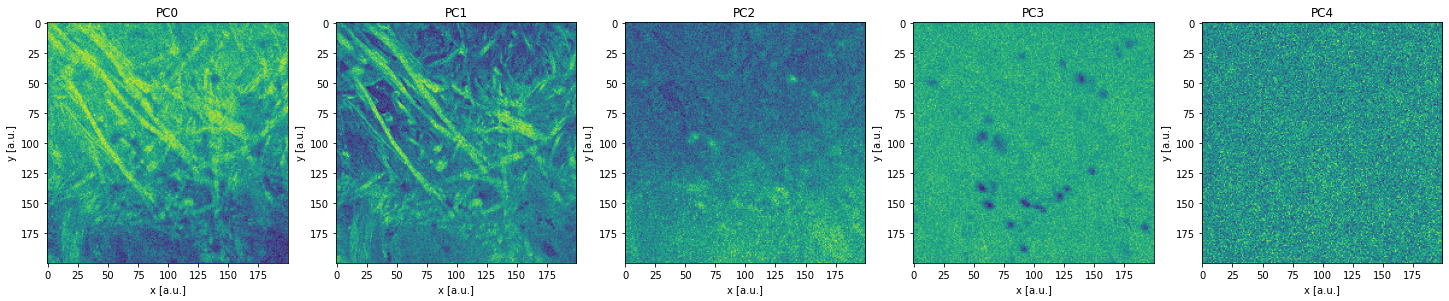

In [17]:
result = np.zeros((200,200,5))

_, axs = plt.subplots(1,5, figsize=(25,10))

for k in range(5):
    for i in range(200):
        for j in range(200):
            index = i*200 + j
            result[i,j,k] = var[index,k]
    axs[k].imshow(result[:,:,k])
    axs[k].title.set_text('PC'+str(k))
    axs[k].set_xlabel('x [a.u.]')
    axs[k].set_ylabel('y [a.u.]')

PCA on only BCC

In [20]:
pca_training_data = np.zeros((1000,1024))
count = 0

for i in range(200):
    for j in range(200):
        if count < 1000:
            if target[i,j] == 1:
                index = i*200 + j
                pca_training_data[count] = D[index,:]
                count += 1

In [39]:
### Perform PCA dimensionality reduction ###
norm_data = normalize(pca_training_data)
pca = PCA(n_components=10) 
pca.fit(norm_data.T)
pca.transform(norm_data.T)

comp = pca.components_
var = comp.T * np.sqrt(pca.explained_variance_)

In [40]:
comp.shape

(10, 1000)

IndexError: index 1024 is out of bounds for axis 0 with size 1024

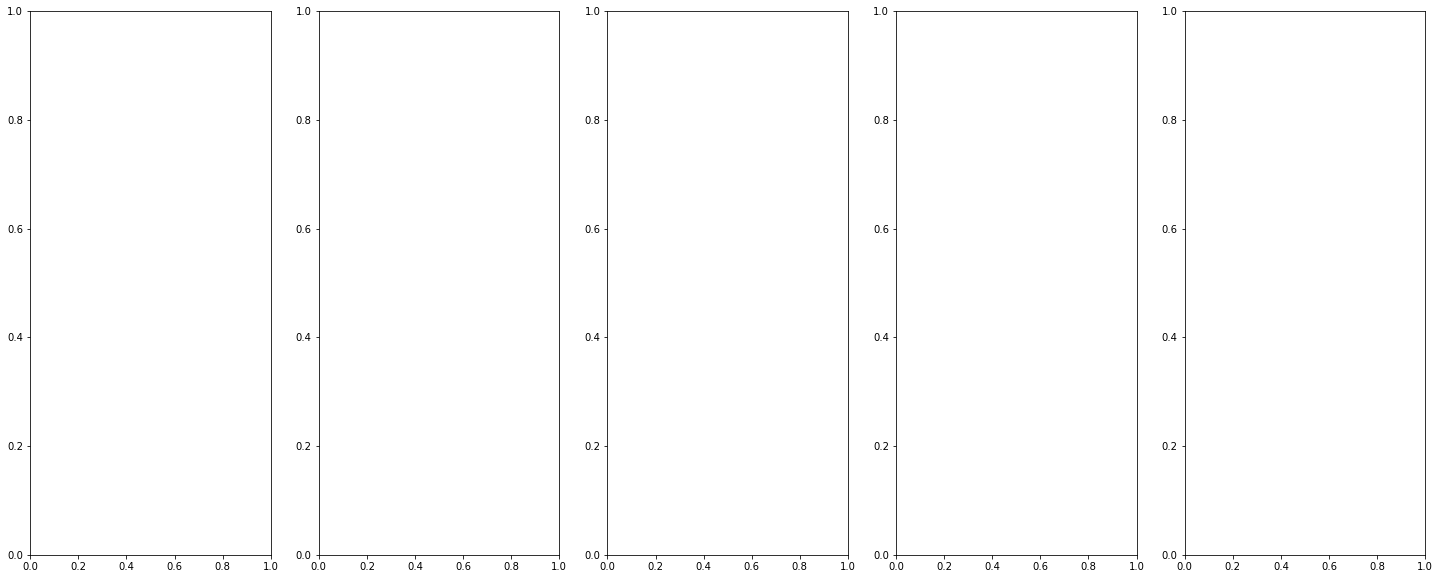

In [24]:
result = np.zeros((200,200,5))

_, axs = plt.subplots(1,5, figsize=(25,10))

for k in range(5):
    for i in range(200):
        for j in range(200):
            index = i*200 + j
            result[i,j,k] = var[index,k]
    axs[k].imshow(result[:,:,k])
    axs[k].title.set_text('PC'+str(k))
    axs[k].set_xlabel('x [a.u.]')
    axs[k].set_ylabel('y [a.u.]')